In [1]:
import socket

In [2]:
socket.gethostname()

'salish.eos.ubc.ca'

In [56]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places, geo_tools, evaltools as et
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
import pytz
mpl.rc('xtick', labelsize=24) 
mpl.rc('ytick', labelsize=24) 
mpl.rc('legend', fontsize=24) 
mpl.rc('axes', titlesize=24) 
mpl.rc('figure', titlesize=24) 
mpl.rc('axes', labelsize=24) 
mpl.rc('font', size=24) 

mpl.rcParams['font.size'] = 24
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [4]:
flist=['search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170722T182607Z_20170815T213737Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170815T213738Z_20170825T225506Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170825T225507Z_20170923T032427Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170923T032428Z_20171016T213134Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20171016T213135Z_20180108T160335Z-clean.csv']
slist=[78,78,78,78,67,67,67,67,67,67,67,67,60,60,60]
dfs=list()
for ii in range(0,len(flist)):
    print(flist[ii])
    dfs.append(pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/'+flist[ii],
        skiprows=slist[ii],header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'),na_values=' NaN'))

df=pd.concat(dfs,ignore_index=True)
df.drop(df[df.ChlQC != 1].index, inplace=True)
df.reset_index(inplace=True)
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df=df.assign(dtUTC=dts)
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
print('totlen=',len(df))

search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv
search4979680/BritishColumb

newlen= 1336254


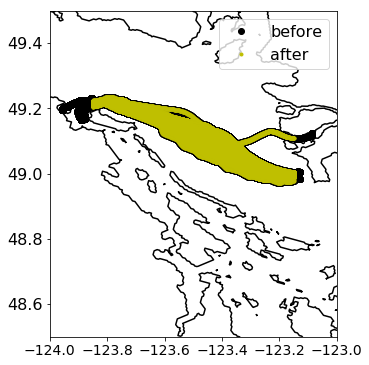

In [5]:
# chop off ends:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
#ax.plot(df['Lon'],df['Lat'], 'ro',label='data')
ax.plot(df['Lon'],df['Lat'], 'ko',label='before')
df.drop(df.loc[(df.Lon<-123.85)|(df.Lon>-123.15)].index,inplace=True)
ax.plot(df['Lon'],df['Lat'],'y.',label='after')
#ax.plot(df2.loc[60,['Lon']],df2.loc[60,['Lat']],'m.')
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48.5, 49.5)
ax.legend()
ax.set_xlim(-124., -123);

def pacToUTC(pactime0):
    # input datetime object without tzinfo in Pacific Time and 
    # output datetime object (or np array of them) without tzinfo in UTC
    pactime=np.array(pactime0,ndmin=1)
    if pactime.ndim>1:
        raise Exception('Error: ndim>1')
    out=np.empty(pactime.shape,dtype=object)
    pac=pytz.timezone('Canada/Pacific')
    utc=pytz.utc
    for ii in range(0,len(pactime)):
        itime=pactime[ii]
        loc_t=pac.localize(itime)
        utc_t=loc_t.astimezone(utc)
        out[ii]=utc_t.replace(tzinfo=None)
    return (out[0] if np.isscalar(pactime0) else out)
# chose only late night sailings

pac=pytz.timezone('Canada/Pacific')
utc=pytz.utc
df['local']=[utc.localize(ii).astimezone(pac).replace(tzinfo=None) for ii in df['dtUTC']]
df.drop(df.loc[(df['local'].dt.hour<22)&(df['local'].dt.hour>2)].index,inplace=True)

print('newlen=',len(df))

In [6]:
df.tail()

,index,TimeUTC,CDOM,CDOMQC,Chlorophyll_ug,ChlQC,Turbidity_NTU,TurbQC,Lat,LatQC,Lon,LongQC,dtUTC,local
13436049,13638234,2018-01-08T08:29:48.989Z,10.028,1,0.8418,1,21.386,1,49.001448,8,-123.150553,8,2018-01-08 08:29:48,2018-01-08 00:29:48
13436050,13638235,2018-01-08T08:29:50.062Z,10.488,1,0.8784,1,20.350,1,49.001448,8,-123.150415,8,2018-01-08 08:29:50,2018-01-08 00:29:50
13436051,13638236,2018-01-08T08:29:51.135Z,10.212,1,0.8174,1,20.942,1,49.001448,8,-123.150278,8,2018-01-08 08:29:51,2018-01-08 00:29:51
13436052,13638237,2018-01-08T08:29:52.208Z,10.212,1,0.8296,1,19.388,1,49.001448,8,-123.150141,8,2018-01-08 08:29:52,2018-01-08 00:29:52
13436053,13638238,2018-01-08T08:29:53.281Z,10.120,1,0.8540,1,21.608,1,49.001448,8,-123.150004,8,2018-01-08 08:29:53,2018-01-08 00:29:53


In [7]:
def _adelta(x):
    return x.max() - x.min()

_adelta.__name__='delta'

def _crename(xx,cdict):
    return [cdict[x] if x in cdict.keys() else x for x in xx ]

def subsampleFerry(df0,interval,window,nmin,targetVar):
    df0['ts']=(df0['dtUTC']-dt.datetime(1900,1,1)).dt.total_seconds()
    df0.drop(df0[df0.ts%interval+window/2 > window].index, inplace=True)
    df0['tind']=[dt.datetime(1900,1,1)+dt.timedelta(seconds=np.round(aa/interval)*interval) for aa in df0['ts']]
    agg={targetVar:['mean','std','count'],
         'Lat':['mean',_adelta],
         'Lon':['mean',_adelta]}
    df2=df0.groupby(['tind'],as_index=False).agg(agg)
    ndict={'tind':'dtUTC','Chlorophyll_ug_mean':'Chl','Lat_mean':'Lat','Lon_mean':'Lon'}
    df2.columns = _crename(['_'.join(tup).rstrip('_') for tup in df2.columns.values],ndict)
    df2.drop(df2[df2.Chlorophyll_ug_count<nmin].index, inplace=True)
    df2.reset_index(inplace=True)
    return df2

In [8]:
interval=5*60
window=60
nmin=3
targetVar='Chlorophyll_ug'
t0=dt.datetime.now()
df2=subsampleFerry(df,interval,window,nmin,targetVar)
print((dt.datetime.now()-t0))
len(df2)

0:00:10.998825


14596

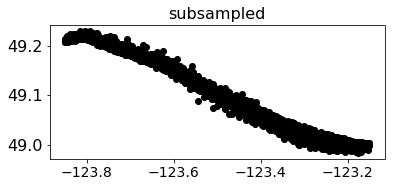

In [9]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
#ax.plot(df['Lon'],df['Lat'], 'ro',label='data')
ax.plot(df2['Lon'],df2['Lat'], 'ko')
ax.set_title('subsampled')

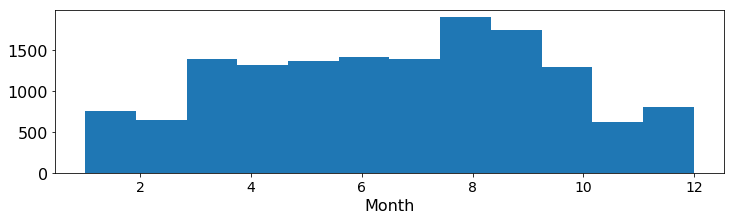

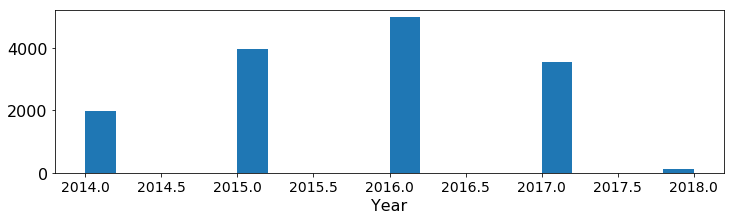

In [10]:
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.month for xx in df2['dtUTC']],12)
ax.set_xlabel('Month')
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.year for xx in df2['dtUTC']],20)
ax.set_xlabel('Year')

In [11]:
df2.tail()

,index,dtUTC,Chl,Chlorophyll_ug_std,Chlorophyll_ug_count,Lat,Lat_delta,Lon,Lon_delta
14591,14866,2018-01-08 08:05:00,1.013021,0.030497,29,49.041049,0.001562,-123.354310,0.003601
14592,14867,2018-01-08 08:10:00,1.010076,0.019666,29,49.027859,0.000865,-123.316810,0.004141
14593,14868,2018-01-08 08:15:00,0.986938,0.019926,29,49.019042,0.000892,-123.275191,0.004174
14594,14869,2018-01-08 08:20:00,0.911634,0.020072,29,49.010872,0.000779,-123.233007,0.004271
14595,14870,2018-01-08 08:25:00,0.893124,0.021965,29,49.003942,0.000646,-123.190245,0.004359


In [12]:
PATH= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1) #end of current ONC file is <2017 7 3
flen=1
namfmt='nowcast'
filemap={'diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}
fdict={'ptrc_T':1,'grid_T':1}

In [13]:
it0=dt.datetime.now()
print(it0)
data=et.matchData(df2,filemap, fdict, start_date, end_date, namfmt, PATH, flen,wrapSearch=True,wrapTol=12,method='ferry')
print(dt.datetime.now()-it0)

2019-03-10 17:07:58.890917
data is matched to mean of upper 3 model levels
done index ptrc_T 2019-03-10 17:09:20.741391
ptrc_T progress: 0.0%
ptrc_T progress: 10.0%
ptrc_T progress: 20.0%
ptrc_T progress: 30.0%
ptrc_T progress: 40.0%
ptrc_T progress: 50.0%
ptrc_T progress: 60.0%
ptrc_T progress: 70.0%
ptrc_T progress: 80.0%
ptrc_T progress: 90.0%
2:26:08.382008


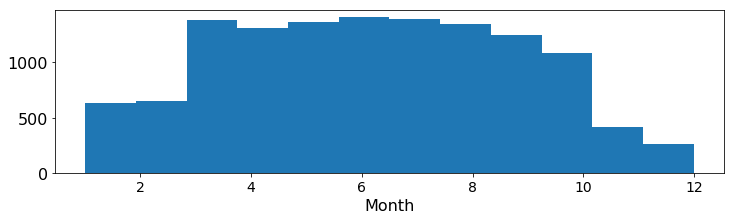

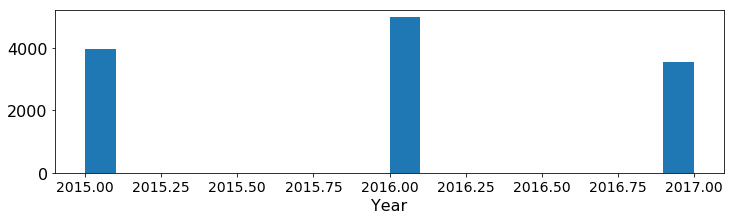

In [14]:
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.month for xx in data['dtUTC']],12)
ax.set_xlabel('Month')
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.year for xx in data['dtUTC']],20)
ax.set_xlabel('Year')

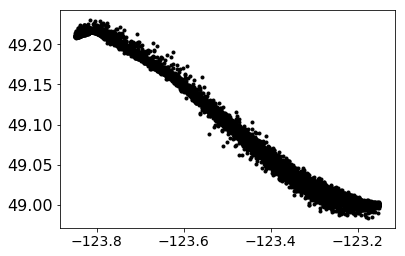

In [15]:
plt.plot(data['Lon'],data['Lat'],'k.')

In [16]:
mod_chl_N=2.0
mod_chl_N=1.6
data['modChl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])
data['l10_obsChl']=np.log10(data['Chl']+0.01)
data['l10_modChl']=np.log10(data['modChl']+0.01)

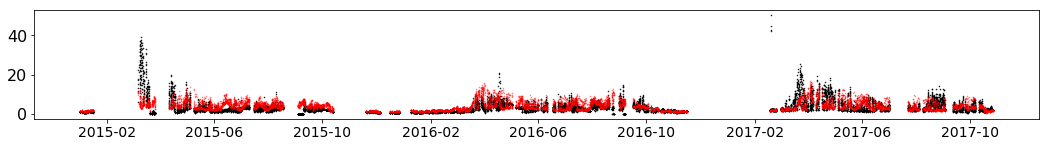

In [17]:
fig,ax=plt.subplots(figsize=(18,2))
ax.plot(data['dtUTC'],data['Chl'],'k.',ms=1)
ax.plot(data['dtUTC'],data['modChl'],'r.',ms=1,alpha=.5)

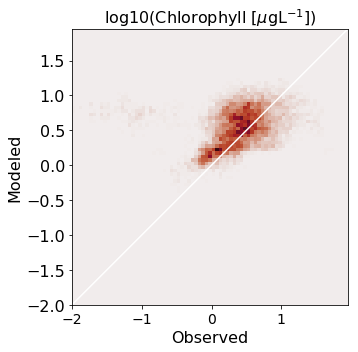

In [18]:
fig,ax=plt.subplots(figsize=(6,5))
ax.hist2d(data['l10_obsChl'],data['l10_modChl'],np.arange(-2,2.0,.05),cmap=cmocean.cm.amp);
ax.set_xlabel('Observed')
ax.set_ylabel('Modeled')
ax.plot((-2,2),(-2,2),'w-')
ax.set_aspect(1)
ax.set_title('log10(Chlorophyll [$\mu$gL$^{-1}$])')
plt.tight_layout()
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/ferryChlPoster.eps',dpi=400,transparent=True)

In [59]:
from matplotlib.colors import LogNorm
cm1=cmocean.cm.thermal
#cm1.set_bad('k')

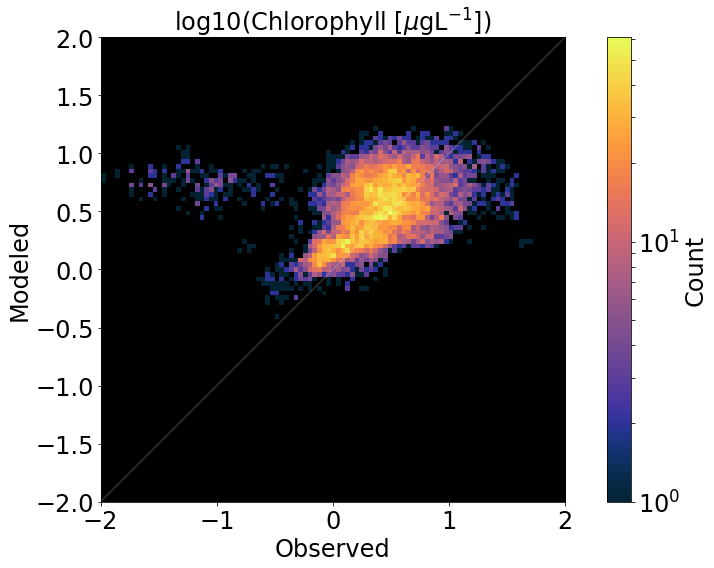

In [61]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
counts, xedges, yedges, m1=ax.hist2d(data['l10_obsChl'],data['l10_modChl'],bins=np.linspace(-2,2,100),norm=LogNorm(),cmap=cm1)
ax.plot((-2,2),(-2,2),'w-',alpha=.2)
ax.set_facecolor('k')
cb=fig.colorbar(m1)#,cax=axcb
cb.set_label('Count')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect(1)
ax.set_ylabel('Modeled',fontsize=24)
ax.set_xlabel('Observed',fontsize=24)
ax.set_title('log10(Chlorophyll [$\mu$gL$^{-1}$])',fontsize=24)
fig.tight_layout()

fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/ferryChlPoster.eps',dpi=200,transparent=True,)

In [ ]:
def _rmse(delf):
    return np.sqrt(np.mean(np.power(delf,2)))
_rmse.__name__='RMSE'

In [ ]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]
    lmask=-1*(tmask[0,0,:,:]-1)

In [ ]:
data['ER']=data['l10_modChl']-data['l10_obsChl']
agg={'ER':[_rmse,'mean'],
     'Chl':'count'}
df3=data.groupby(['i','j'],as_index=False).agg(agg)
df3.columns = ['_'.join(tup).rstrip('_') for tup in df3.columns.values]
df3=df3.reindex()

In [ ]:
df3

In [ ]:
blank=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
blank2=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
for ind, r in df3.iterrows():
    blank[int(r['j']),int(r['i'])]=r['ER_RMSE']
    blank2[int(r['j']),int(r['i'])]=r['ER_mean']
fig,ax=plt.subplots(1,2,figsize=(12,5))
iax=ax[0]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank),vmin=0,vmax=1.)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('RMSE log10 Chl')
iax=ax[1]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank2),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('bias log10 Chl')

In [ ]:
blank=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
blank2=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
for ind, r in df3.iterrows():
    if r['Chl_count']>=3:
        blank[int(r['j']),int(r['i'])]=r['ER_RMSE']
        blank2[int(r['j']),int(r['i'])]=r['ER_mean']
fig,ax=plt.subplots(1,2,figsize=(12,5))
iax=ax[0]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank),vmin=0,vmax=1.)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('RMSE log10 Chl, n>2')
iax=ax[1]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank2),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('bias log10 Chl, n>2')

In [ ]:
Ns,ex,ey=np.histogram2d(data['l10_obsChl'],data['l10_modChl'],np.arange(-2,2.0,.05));
plt.pcolormesh(ex,ey,Ns.T)